<a href="https://colab.research.google.com/github/ICL-Neurotech/Hackathon/blob/main/sEMG_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hackathon Challenge: Lightweight sEMG Modeling**

**Welcome** to the hackathon challenge! Here, you'll explore surface electromyography (sEMG) signals from the [**Ninapro DB5**](https://ninapro.hevs.ch/instructions/DB5.html) dataset. Your goal is to build a **compact** (low-parameter) and **fast** (low-latency) neural network that **accurately** classifies different hand gestures from the sEMG data.

---

## 1. Introduction & Context

### Why sEMG?

Surface electromyography (sEMG) measures electrical activity from skeletal muscles using electrodes on the skin. It's used in:
- **Prosthetic Control**: Mapping user intent to artificial limb movements.  
- **Human-Computer Interaction**: Gesture-based input for VR/AR or wearable devices.  
- **Rehabilitation**: Monitoring muscle activation to assist therapy.

A **high-performing** sEMG model can recognise gestures or subtle muscle actions in real time. However, real devices (e.g., wrist-worn) have **strict resource constraints**: minimal compute power, battery usage, memory, etc. Therefore, solutions must be **lightweight** in both **model size** and **inference time**.

### About the Ninapro DB5 Dataset

We use **Ninapro DB5** (Pizzolato et al., 2017). Key points:
- **Subjects**: 10 total, each wearing **two Myo armbands** (16 total sEMG channels).  
- **Sampling Rate**: 200 Hz.  
- **Gesture Set**: ~52 hand/wrist/finger movements + a rest position.  
- **Repetitions**: Each gesture is repeated multiple times.  
- **Data Format**: MATLAB (`.mat`) files containing:
  - `emg`: Nx16 array of sEMG data.  
  - `restimulus`: Nx1 array of refined gesture labels (1..52, 0 for rest).  
  - And optionally `acc`, `glove`, plus demographics.

### The Challenge

1. **Load** sEMG signals and gesture labels.  
2. **Build** a **small** neural network that can classify gestures accurately.  
3. **Constrain** your model in terms of:
   - **Accuracy** (higher is better)  
   - **Parameter Count** (lower is better)  
   - **Inference Latency** (lower is better)  

We'll measure these three and compute a **combined score**. The top solutions on the leaderboard will **balance** all constraints effectively.

### Constraints at a Glance

- **Parameter Limit**: Aim to keep **< 1M** parameters .  
- **Latency**: Must be fast enough to handle real-time sEMG (minimum 5-10 inferences per second).  
- **Accuracy**: Classify gestures on a held-out set with minimal error.




---
## 1b. Setup

In this section we'll install dependencies


In [ ]:
!pip install torch scipy --quiet

In [ ]:
import os
import zipfile
import requests
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from scipy.io import loadmat

print("Setup complete. Versions:")
print(f"  PyTorch: {torch.__version__}")

---
## 2. Download and Unzip the Dataset

We'll demonstrate with **Subject 1** from Ninapro DB5.  
- A typical zip file is named `s1.zip`.  
- After unzipping, you'll find a folder (named `s1` or similar) containing multiple `.mat` files—one per exercise.


In [ ]:
url = "https://ninapro.hevs.ch/files/DB5_Preproc/s1.zip"  # Example for s1
zip_filename = "s1.zip"

if not os.path.exists(zip_filename):
    print(f"Downloading {url} to {zip_filename} ...")
    r = requests.get(url, allow_redirects=True)
    open(zip_filename, 'wb').write(r.content)
    print("Download complete.")
else:
    print(f"{zip_filename} already present, skipping download.")

# Unzip
extract_folder = "ninapro_s1"
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zf:
    zf.extractall(extract_folder)

In [ ]:
# Take a peek inside
dataset_folder = extract_folder + '/s1'
print(os.listdir(dataset_folder))

---
### 3. Loading a `.mat` File

Subject 1 often has files like `S1_E1.mat`, `S1_E2.mat`, and `S1_E3.mat` for exercises 1, 2, and 3.

Let's pick **Exercise 1** (`S1_E1.mat`) as an example. The file typically includes variables:
- `emg`: Nx16 array of sEMG signals (N samples, 16 channels).
- `restimulus`: Nx1 array of gesture labels (1..52, plus 0 for “rest”).
- (Optional) `glove`, `acc` for glove sensor and accelerometer.

We'll parse them, build a simple dataset, and do a quick visualisation.


In [ ]:
# Walk the .mat files inside the unzipped folder
mat_files = []
for root, dirs, files in os.walk(dataset_folder):
    for f in files:
        if f.endswith(".mat"):
            mat_files.append(os.path.join(root, f))

if not mat_files:
    raise FileNotFoundError("No .mat files found. Check the unzipped structure.")

print("Found .mat files:")
for mf in mat_files:
    print("  ", mf)

demo_mat = mat_files[0]
print(f"\nUsing: {demo_mat}")

data = loadmat(demo_mat)
print("Keys in .mat:", list(data.keys()))


In [ ]:
# Suppose we have 'emg' and 'restimulus' keys:
emg_signal = data['emg']  # shape (N, 16)
labels = data['restimulus'].flatten()  # shape (N, ), integer-coded

print("EMG shape:", emg_signal.shape)
print("Unique labels:", np.unique(labels))


### Quick Visualisation

Let's plot the first 1000 samples of **channel 0** to see raw amplitude.


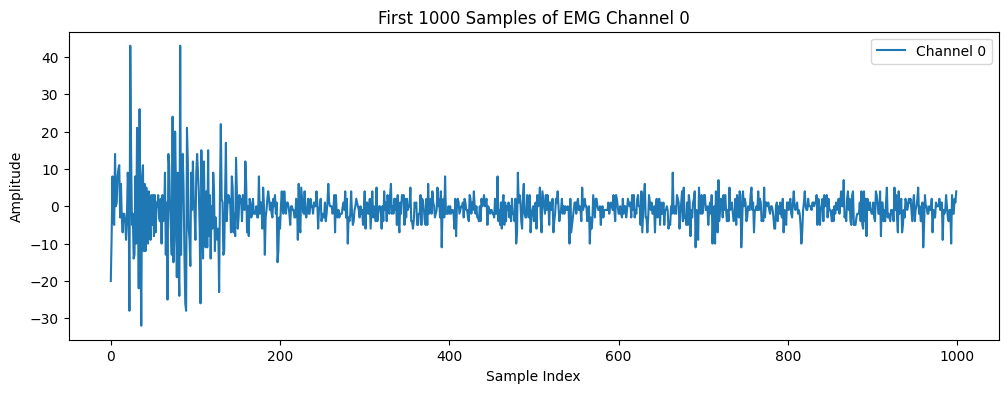

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(emg_signal[:1000, 0], label="Channel 0")
plt.title("First 1000 Samples of EMG Channel 0")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


---
## 4. Building a Small Classification Model

We'll do a **simple** neural network that:
1. Takes a short window of EMG data (e.g. 200 ms) as input.
2. Outputs a classification over the ~53 possible gestures (52 + rest).
3. Has **fewer** than **1 million parameters** to keep it lightweight.


In [ ]:
### YOUR IMPLEMENTATION

In [ ]:
### KEEP GOING....

---
## 5. Training with PyTorch Lightning

In [ ]:
!pip install pytorch_lightning --quiet
import pytorch_lightning as pl

In [ ]:
### YOUR IMPLEMENTATION

---
## 6. Final Evaluation: Accuracy, Param Count, and Latency

Below is a **combined scoring function** that:
1. **Computes accuracy** on the validation set.
2. **Measures parameter count** of your model.
3. **Times** how long a forward pass takes for a representative batch.

We create a single “score” that you can submit—**lower** is better (a combination of error, param penalty, and latency penalty).


In [ ]:
def compute_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in data_loader:
            x = x.cuda() if torch.cuda.is_available() else x
            y = y.cuda() if torch.cuda.is_available() else y
            logits = model(x)
            preds = torch.argmax(logits, dim=1)
            correct += (preds == y).sum().item()
            total += len(y)
    return correct / total if total > 0 else 0.0

def measure_inference_latency(model, sample_input, runs=10):
    model.eval()
    with torch.no_grad():
        import time
        start = time.time()
        for _ in range(runs):
            _ = model(sample_input)
        end = time.time()
    return (end - start) / runs

def final_score(model, val_loader):
    # 1) Accuracy (0..1)
    acc = compute_accuracy(model, val_loader)
    error = 1.0 - acc  # so lower is better

    # 2) Param count
    pcount = sum(p.numel() for p in model.parameters())

    # 3) Latency
    sample_batch = next(iter(val_loader))[0]
    sample_batch = sample_batch.cuda() if torch.cuda.is_available() else sample_batch
    avg_time = measure_inference_latency(model, sample_batch, runs=10)

    # Combine them into a single score
    score = error + (1e-7 * pcount) + (10.0 * avg_time)

    return {
        'accuracy': acc,
        'param_count': pcount,
        'avg_forward_time': avg_time,
        'combined_score': score
    }

results = final_score(pl_model.model, val_loader)
print("Validation Accuracy:         ", results['accuracy'])
print("Parameter Count:             ", results['param_count'])
print("Average Inference Time (sec):", results['avg_forward_time'])
print("Final Combined Score:        ", results['combined_score'])


# **End of Notebook**

Feel free to adapt everything—just keep to the constraints and submit your best “combined_score” results.
Happy hacking!
